In [1]:
# Load packages
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Get current working directory
os.getcwd()

'/Users/neelpendyala/Desktop'

In [3]:
# Change working directory
os.chdir('/Users/neelpendyala/Documents/BASKETBALL')

In [4]:
# Confirm working directory is correct
os.getcwd()

'/Users/neelpendyala/Documents/BASKETBALL'

In [5]:
# Get path of your terminal window
sys.path[0]

'/Users/neelpendyala/Desktop'

In [6]:
# Load dataset containing points per attempt data
player_game_data = pd.read_csv(os.path.dirname(sys.path[0]) + '/Downloads/player_game_data.csv')
player_game_data.head()

,nbagameid,gamedate,season,gametype,nbapersonid,player_name,nbateamid,team,team_name,opposingnbateamid,...,defensivepossessions,andones,teampoints,opponentteampoints,teamshotattempts,teamfgmade,teamfgattempted,teamturnovers,opponentteamfg2attempted,opponentteamfg3attempted
0,21700826,2018-02-10,2017,2,1627821,James Webb III,1610612751,BKN,Brooklyn Nets,1610612740,...,15,0,17,26,14,6,13,1,9,4
1,21700826,2018-02-10,2017,2,1626156,D'Angelo Russell,1610612751,BKN,Brooklyn Nets,1610612740,...,72,0,81,84,71,26,66,8,40,12
2,21700826,2018-02-10,2017,2,203917,Nik Stauskas,1610612751,BKN,Brooklyn Nets,1610612740,...,23,0,21,33,23,8,22,2,16,5
3,21700826,2018-02-10,2017,2,1626143,Jahlil Okafor,1610612751,BKN,Brooklyn Nets,1610612740,...,10,0,11,18,10,4,9,1,8,2
4,21700826,2018-02-10,2017,2,202391,Jeremy Lin,1610612751,BKN,Brooklyn Nets,1610612740,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Filter out playoff games
player_game_data_working = player_game_data.query('gametype == 2')
player_game_data_working.head()

,nbagameid,gamedate,season,gametype,nbapersonid,player_name,nbateamid,team,team_name,opposingnbateamid,...,defensivepossessions,andones,teampoints,opponentteampoints,teamshotattempts,teamfgmade,teamfgattempted,teamturnovers,opponentteamfg2attempted,opponentteamfg3attempted
0,21700826,2018-02-10,2017,2,1627821,James Webb III,1610612751,BKN,Brooklyn Nets,1610612740,...,15,0,17,26,14,6,13,1,9,4
1,21700826,2018-02-10,2017,2,1626156,D'Angelo Russell,1610612751,BKN,Brooklyn Nets,1610612740,...,72,0,81,84,71,26,66,8,40,12
2,21700826,2018-02-10,2017,2,203917,Nik Stauskas,1610612751,BKN,Brooklyn Nets,1610612740,...,23,0,21,33,23,8,22,2,16,5
3,21700826,2018-02-10,2017,2,1626143,Jahlil Okafor,1610612751,BKN,Brooklyn Nets,1610612740,...,10,0,11,18,10,4,9,1,8,2
4,21700826,2018-02-10,2017,2,202391,Jeremy Lin,1610612751,BKN,Brooklyn Nets,1610612740,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Sort the data
player_game_data_working = player_game_data_working.sort_values(by=['gamedate', 'nbagameid', 'nbateamid', 'nbapersonid'], 
                                                        ascending=[True, True, True, True])
player_game_data_working.head()

,nbagameid,gamedate,season,gametype,nbapersonid,player_name,nbateamid,team,team_name,opposingnbateamid,...,defensivepossessions,andones,teampoints,opponentteampoints,teamshotattempts,teamfgmade,teamfgattempted,teamturnovers,opponentteamfg2attempted,opponentteamfg3attempted
222891,21400001,2014-10-28,2014,2,2422,John Salmons,1610612740,NOP,New Orleans Pelicans,1610612753,...,19,0,28,18,24,10,20,0,15,0
158180,21400001,2014-10-28,2014,2,201569,Eric Gordon,1610612740,NOP,New Orleans Pelicans,1610612753,...,61,1,65,48,69,27,63,8,46,8
222896,21400001,2014-10-28,2014,2,201582,Alexis Ajinca,1610612740,NOP,New Orleans Pelicans,1610612753,...,5,0,4,10,4,1,3,1,8,0
158182,21400001,2014-10-28,2014,2,201583,Ryan Anderson,1610612740,NOP,New Orleans Pelicans,1610612753,...,42,1,49,31,57,19,50,3,31,5
158179,21400001,2014-10-28,2014,2,201600,Omer Asik,1610612740,NOP,New Orleans Pelicans,1610612753,...,65,1,68,57,77,29,70,7,46,8


In [9]:
# Get the points per attempt for each season
ppa_by_season = player_game_data_working.groupby('season').agg({'shotattemptpoints': 'sum', 'shotattempts': 'sum'}).reset_index()
ppa_by_season['PPA'] = ppa_by_season['shotattemptpoints']/ppa_by_season['shotattempts']
ppa_by_season

,season,shotattemptpoints,shotattempts,PPA
0,2014,236064,224474,1.051632
1,2015,242110,227099,1.066099
2,2016,250211,229216,1.091595
3,2017,252023,229087,1.100119
4,2018,262840,237646,1.106015
5,2019,227677,203911,1.116551
6,2020,234344,206858,1.132874
7,2021,262489,234389,1.119886
8,2022,272997,236757,1.153068
9,2023,272614,236944,1.150542


In [10]:
# Get the points per attempt for each player and season
player_ppa_by_season = player_game_data_working.groupby(['season', 'nbapersonid', 'player_name']).agg({'shotattemptpoints': 'sum', 'shotattempts': 'sum'}).reset_index()
player_ppa_by_season['PPA'] = player_ppa_by_season['shotattemptpoints']/player_ppa_by_season['shotattempts']
player_ppa_by_season = player_ppa_by_season.sort_values(by=['PPA', 'shotattemptpoints'], ascending=[False, False])
player_ppa_by_season

,season,nbapersonid,player_name,shotattemptpoints,shotattempts,PPA
1813,2017,1626148,Anthony Brown,3,1,3.0
2030,2017,1628513,Naz Mitrou-Long,3,1,3.0
2354,2018,1626296,Jordan Sibert,3,1,3.0
3377,2020,1627775,Patrick McCaw,5,2,2.5
1803,2017,204065,David Stockton,8,4,2.0
...,...,...,...,...,...,...
5452,2023,1641777,Charles Bediako,0,0,NaN
5457,2023,1641798,Jaylen Martin,0,0,NaN
5460,2023,1641811,Jabari Rice,0,0,NaN
5469,2023,1641936,Miles Norris,0,0,NaN


In [11]:
# Calculate efficiency metric
player_ppa_by_season = player_ppa_by_season.merge(ppa_by_season[['season', 'PPA']], how='inner', left_on='season', right_on='season').rename(columns={"PPA_x": "PPA_player", "PPA_y": "PPA_league"})
player_ppa_by_season['EFF'] = player_ppa_by_season['shotattemptpoints'] - player_ppa_by_season['shotattempts']*player_ppa_by_season['PPA_league']
player_ppa_by_season = player_ppa_by_season.sort_values(by=['EFF', 'PPA_player', 'shotattemptpoints'], ascending=[False, False, False])
player_ppa_by_season

,season,nbapersonid,player_name,shotattemptpoints,shotattempts,PPA_player,PPA_league,EFF
2173,2015,201939,Stephen Curry,2237,1698,1.317432,1.066099,426.764024
1678,2014,201939,Stephen Curry,1789,1429,1.251924,1.051632,286.218137
3795,2022,203999,Nikola Jokic,1604,1143,1.403325,1.153068,286.042892
3185,2021,203999,Nikola Jokic,1877,1428,1.314426,1.119886,277.802546
580,2018,203507,Giannis Antetokounmpo,1924,1494,1.287818,1.106015,271.613846
...,...,...,...,...,...,...,...,...
4238,2022,1628415,Dillon Brooks,1022,1044,0.978927,1.153068,-181.803343
965,2018,201566,Russell Westbrook,1616,1633,0.989590,1.106015,-190.122215
2599,2015,1626144,Emmanuel Mudiay,849,983,0.863683,1.066099,-198.975244
3622,2021,202704,Reggie Jackson,1216,1269,0.958235,1.119886,-205.135552


In [12]:
# Get team names for each player
team_names = player_game_data_working.groupby(['season', 'nbapersonid', 'player_name']).agg({'team_name': lambda x: ', '.join(x.unique())}).reset_index()

In [13]:
# Merge team names into the other data frame (player_ppa_by_season)
player_ppa_by_season = team_names.merge(player_ppa_by_season, how='inner', left_on=['season', 'nbapersonid', 'player_name'], right_on=['season', 'nbapersonid', 'player_name'])
player_ppa_by_season = player_ppa_by_season.sort_values(by=['EFF', 'PPA_player', 'shotattemptpoints'], ascending=[False, False, False])
player_ppa_by_season

,season,nbapersonid,player_name,team_name,shotattemptpoints,shotattempts,PPA_player,PPA_league,EFF
670,2015,201939,Stephen Curry,Golden State Warriors,2237,1698,1.317432,1.066099,426.764024
199,2014,201939,Stephen Curry,Golden State Warriors,1789,1429,1.251924,1.051632,286.218137
4447,2022,203999,Nikola Jokic,Denver Nuggets,1604,1143,1.403325,1.153068,286.042892
3854,2021,203999,Nikola Jokic,Denver Nuggets,1877,1428,1.314426,1.119886,277.802546
2251,2018,203507,Giannis Antetokounmpo,Milwaukee Bucks,1924,1494,1.287818,1.106015,271.613846
...,...,...,...,...,...,...,...,...,...
4533,2022,1628415,Dillon Brooks,Memphis Grizzlies,1022,1044,0.978927,1.153068,-181.803343
2097,2018,201566,Russell Westbrook,Oklahoma City Thunder,1616,1633,0.989590,1.106015,-190.122215
932,2015,1626144,Emmanuel Mudiay,Denver Nuggets,849,983,0.863683,1.066099,-198.975244
3773,2021,202704,Reggie Jackson,LA Clippers,1216,1269,0.958235,1.119886,-205.135552


In [14]:
# Get the points per possession for each player and season
player_ppp_by_season = player_game_data_working.groupby(['season', 'nbapersonid', 'player_name']).agg({'points': 'sum', 'offensivepossessions': 'sum'}).reset_index()
player_ppp_by_season['PPP'] = player_ppp_by_season['points']/player_ppp_by_season['offensivepossessions']
player_ppp_by_season = player_ppp_by_season.sort_values(by=['PPP', 'points'], ascending=[False, False])
player_ppp_by_season

,season,nbapersonid,player_name,points,offensivepossessions,PPP
2030,2017,1628513,Naz Mitrou-Long,3,2.0,1.500000
2379,2018,1627753,Zhou Qi,2,2.0,1.000000
4151,2021,1629958,Ahmad Caver,2,2.0,1.000000
4014,2021,1629005,Malik Newman,8,12.0,0.666667
3145,2020,2617,Udonis Haslem,4,6.0,0.666667
...,...,...,...,...,...,...
5452,2023,1641777,Charles Bediako,0,0.0,NaN
5457,2023,1641798,Jaylen Martin,0,0.0,NaN
5460,2023,1641811,Jabari Rice,0,0.0,NaN
5469,2023,1641936,Miles Norris,0,0.0,NaN


In [15]:
# Merge team names into the other data frame (player_ppp_by_season)
player_ppp_by_season = team_names.merge(player_ppp_by_season, how='inner', left_on=['season', 'nbapersonid', 'player_name'], right_on=['season', 'nbapersonid', 'player_name'])
player_ppp_by_season = player_ppp_by_season.sort_values(by=['PPP', 'points'], ascending=[False, False])
player_ppp_by_season

,season,nbapersonid,player_name,team_name,points,offensivepossessions,PPP
2030,2017,1628513,Naz Mitrou-Long,Utah Jazz,3,2.0,1.500000
2379,2018,1627753,Zhou Qi,Houston Rockets,2,2.0,1.000000
4151,2021,1629958,Ahmad Caver,Indiana Pacers,2,2.0,1.000000
4014,2021,1629005,Malik Newman,Cleveland Cavaliers,8,12.0,0.666667
3145,2020,2617,Udonis Haslem,Miami Heat,4,6.0,0.666667
...,...,...,...,...,...,...,...
5452,2023,1641777,Charles Bediako,San Antonio Spurs,0,0.0,NaN
5457,2023,1641798,Jaylen Martin,"New York Knicks, Brooklyn Nets",0,0.0,NaN
5460,2023,1641811,Jabari Rice,San Antonio Spurs,0,0.0,NaN
5469,2023,1641936,Miles Norris,Atlanta Hawks,0,0.0,NaN


In [44]:
# Merge ppa and ppp datasets into one data frame
player_scoring_and_efficiency = player_ppp_by_season.merge(player_ppa_by_season, how='inner', left_on=['season', 'nbapersonid', 'player_name', 'team_name'], right_on=['season', 'nbapersonid', 'player_name', 'team_name']) 
player_scoring_and_efficiency['scoring'] = (1/3)*player_scoring_and_efficiency['points'] + (2/3)*player_scoring_and_efficiency['EFF']
player_scoring_and_efficiency = player_scoring_and_efficiency.sort_values(by='scoring', ascending=False)
player_scoring_and_efficiency.head(10)

,season,nbapersonid,player_name,team_name,points,offensivepossessions,PPP,shotattemptpoints,shotattempts,PPA_player,PPA_league,EFF,scoring
16,2018,201935,James Harden,Houston Rockets,2818,5793.200000,0.486432,2694,2191,1.229576,1.106015,270.721510,1119.814340
41,2015,201939,Stephen Curry,Golden State Warriors,2375,5732.333333,0.414316,2237,1698,1.317432,1.066099,426.764024,1076.176016
82,2016,201935,James Harden,Houston Rockets,2356,6162.750000,0.382297,2224,1815,1.225344,1.091595,242.755388,947.170259
25,2019,201935,James Harden,Houston Rockets,2335,5273.250000,0.442801,2201,1767,1.245614,1.116551,228.054651,930.369768
100,2015,201935,James Harden,Houston Rockets,2376,6379.416667,0.372448,2230,1899,1.174302,1.066099,205.478139,928.985426
118,2017,2544,LeBron James,Cleveland Cavaliers,2251,6171.066667,0.364767,2168,1746,1.241695,1.100119,247.191931,915.127954
40,2023,203507,Giannis Antetokounmpo,Milwaukee Bucks,2222,5356.000000,0.414862,2127,1641,1.296161,1.150542,238.960742,899.973828
104,2014,201935,James Harden,Houston Rockets,2217,5991.750000,0.370009,2067,1759,1.175099,1.051632,217.179638,883.786425
29,2023,1629029,Luka Dončić,Dallas Mavericks,2370,5468.000000,0.433431,2276,1857,1.225633,1.150542,139.443691,882.962461
36,2017,201935,James Harden,Houston Rockets,2190,5138.750000,0.426174,2061,1679,1.227516,1.100119,213.899916,872.599944


In [45]:
# Change season name
player_scoring_and_efficiency['season'] = player_scoring_and_efficiency['season'].map(lambda x: str(x))+"-"+player_scoring_and_efficiency['season'].map(lambda x: str(x+1)[-2:])
player_scoring_and_efficiency = player_scoring_and_efficiency.reset_index(drop=True)
player_scoring_and_efficiency

,season,nbapersonid,player_name,team_name,points,offensivepossessions,PPP,shotattemptpoints,shotattempts,PPA_player,PPA_league,EFF,scoring
0,2018-19,201935,James Harden,Houston Rockets,2818,5793.200000,0.486432,2694,2191,1.229576,1.106015,270.721510,1119.814340
1,2015-16,201939,Stephen Curry,Golden State Warriors,2375,5732.333333,0.414316,2237,1698,1.317432,1.066099,426.764024,1076.176016
2,2016-17,201935,James Harden,Houston Rockets,2356,6162.750000,0.382297,2224,1815,1.225344,1.091595,242.755388,947.170259
3,2019-20,201935,James Harden,Houston Rockets,2335,5273.250000,0.442801,2201,1767,1.245614,1.116551,228.054651,930.369768
4,2015-16,201935,James Harden,Houston Rockets,2376,6379.416667,0.372448,2230,1899,1.174302,1.066099,205.478139,928.985426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,2020-21,203521,Matthew Dellavedova,Cleveland Cavaliers,36,450.083333,0.079985,34,57,0.596491,1.132874,-30.573804,-8.382536
5470,2020-21,204025,Tim Frazier,Memphis Grizzlies,8,132.000000,0.060606,6,20,0.300000,1.132874,-16.657475,-8.438317
5471,2022-23,1630195,Leandro Bolmaro,Utah Jazz,6,141.000000,0.042553,6,20,0.300000,1.153068,-17.061367,-9.374244
5472,2014-15,201575,Brandon Rush,Golden State Warriors,30,562.333333,0.053349,28,57,0.491228,1.051632,-31.943013,-11.295342


Text(0, 0.5, 'Scoring Ability')

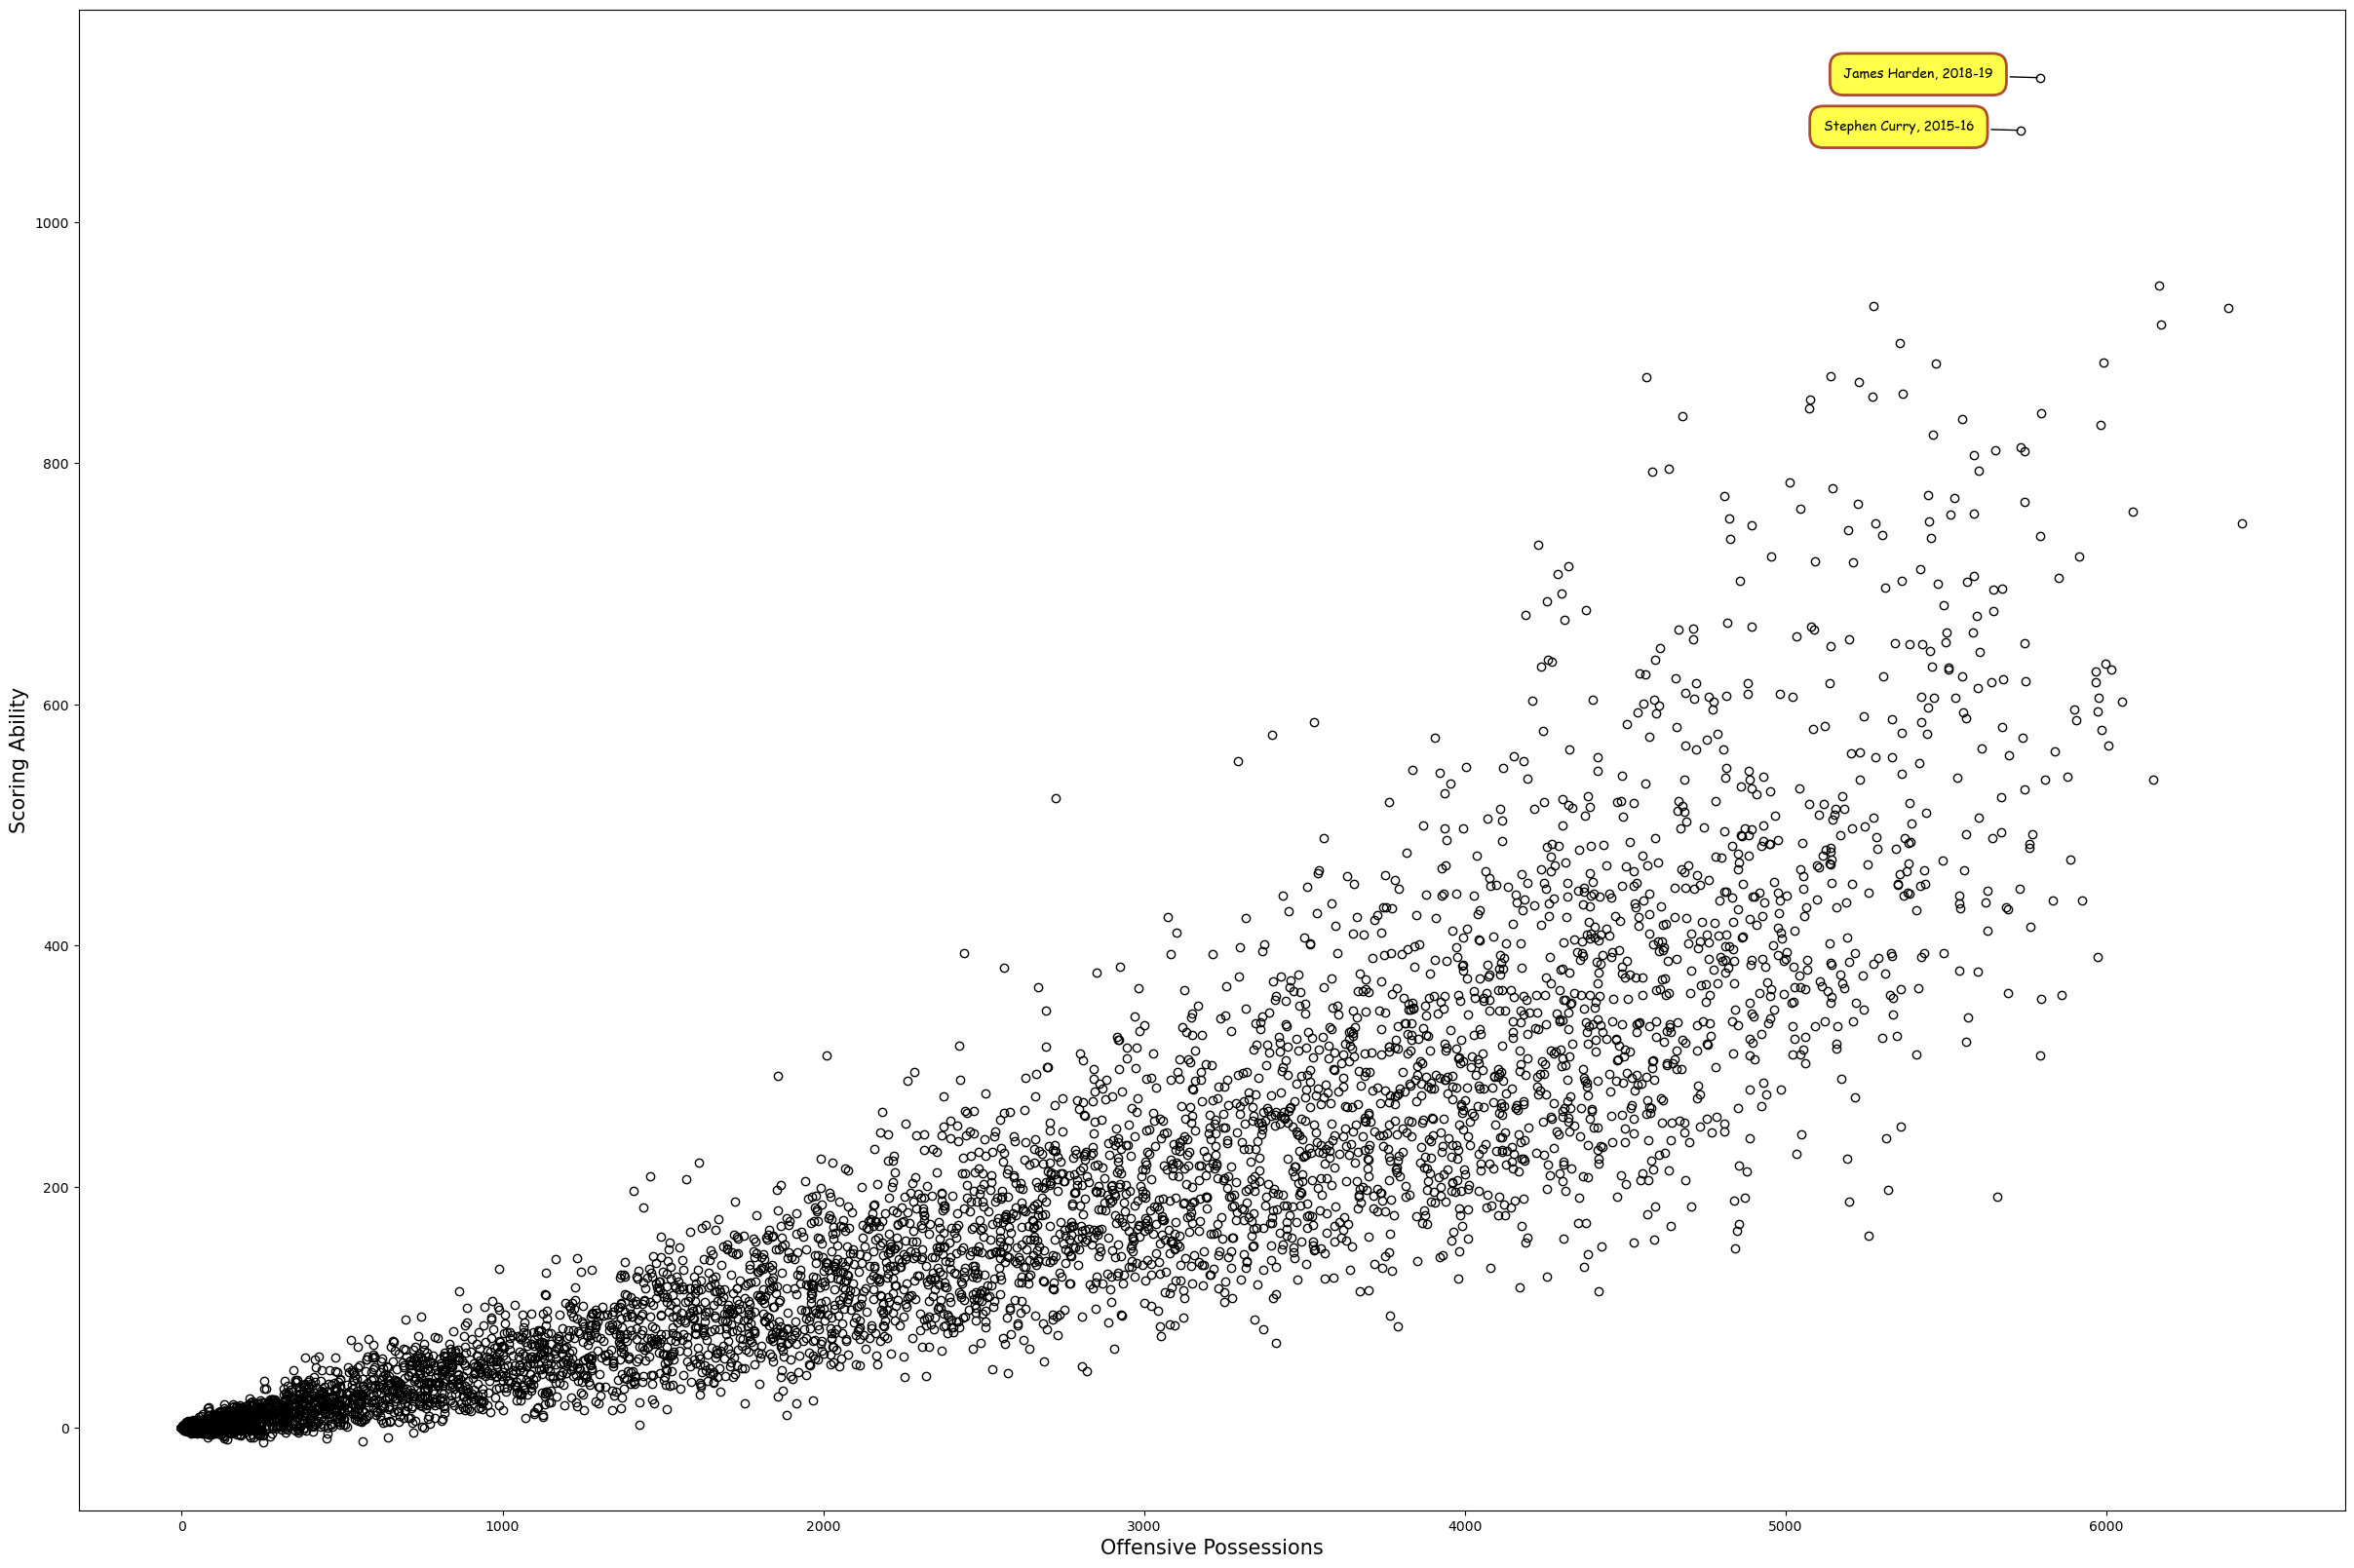

In [73]:
# Plot the data
plt.figure(figsize=(30, 20))
plt.plot(player_scoring_and_efficiency['offensivepossessions'], player_scoring_and_efficiency['scoring'], 'o', color='black', mfc='none')

# Add text annotations for Curry and Harden
for i in range(player_scoring_and_efficiency.head(2).shape[0]):
    string = player_scoring_and_efficiency['player_name'][i]+', '+player_scoring_and_efficiency['season'][i]
    plt.annotate(
        string,
        xy=(player_scoring_and_efficiency['offensivepossessions'][i], player_scoring_and_efficiency['scoring'][i]),
        xytext=(-90, 0),
        textcoords='offset points',
        fontsize=10, fontfamily='Comic Sans MS',
        ha='center', va='baseline',
        bbox=dict(boxstyle='round,pad=1', facecolor='yellow', alpha=0.7, edgecolor='darkred', lw=2),
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3')
    )

# Add axis labels
plt.xlabel('Offensive Possessions', fontsize=15)
plt.ylabel('Scoring Ability', fontsize=15)